In [407]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

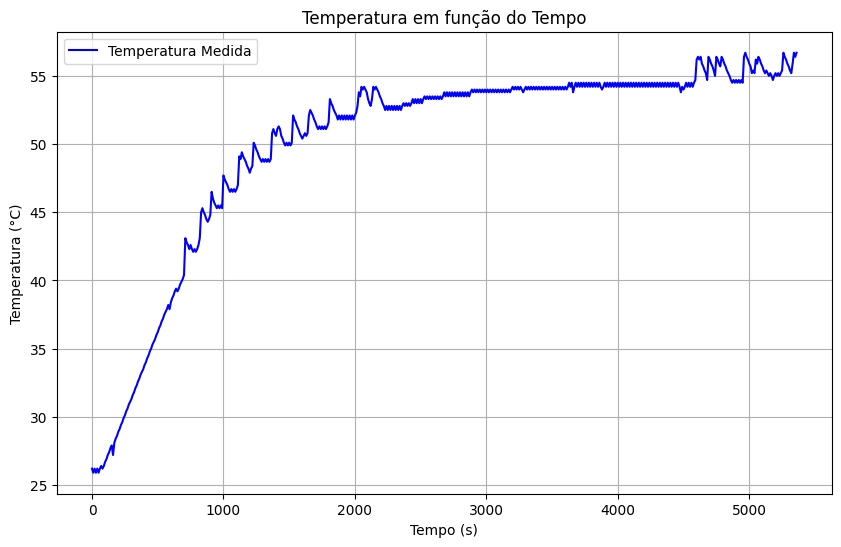

In [408]:
data = pd.read_csv(os.path.join(".", "dados_aquecedor.csv"))
temp = data["Unit"].to_numpy()
time = 10 * np.arange(len(temp))

plt.figure(figsize=(10, 6))
plt.plot(time , temp, label="Temperatura Medida", color="blue")
plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Temperatura em função do Tempo")
plt.legend()
plt.grid()



/tmp/ipykernel_28985/162432316.py:5: RuntimeWarning: overflow encountered in exp
  return ( (A1 - A2) / (1 + np.exp((x - x0) / dx)) ) + A2


28.097711038752287 28.18987346112985


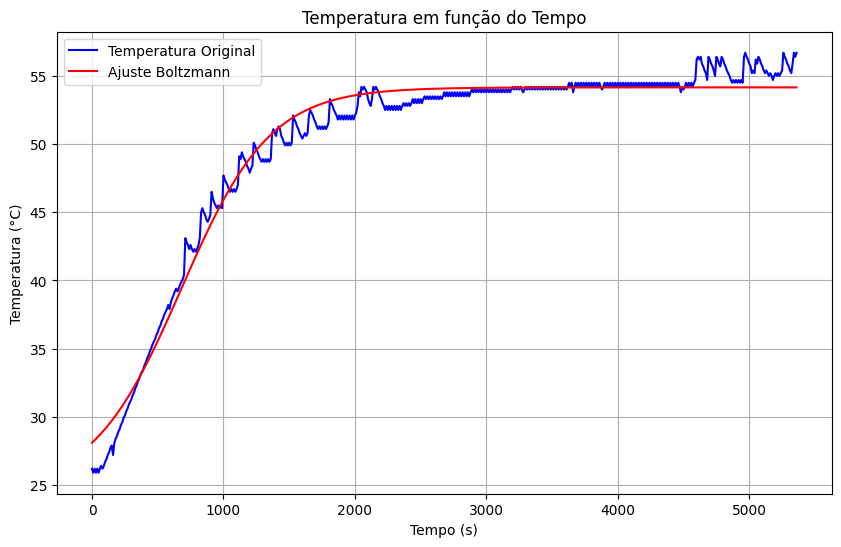

Parâmetros ajustados:
A1 (Temperatura inicial): 24.61
A2 (Temperatura final): 54.16
x0 (Ponto de inflexão): 679.24
dx (Taxa de transição): 337.98


In [409]:
# Função sigmoidal de Boltzmann
# util para representar fenômenos que apresentam uma curva em "S"
def boltzmann(x, A1, A2, x0, dx):
    # https://www.originlab.com/doc/origin-help/boltzmann-fitfunc
    return ( (A1 - A2) / (1 + np.exp((x - x0) / dx)) ) + A2

p0 = [min(temp), max(temp), np.median(time), 1] # Chutes iniciais para os parâmetros (A1, A2, x0, dx)

percentage = 5
b=(
    [min(temp)-(min(temp)*(percentage/100)), max(temp)-(max(temp)*(percentage/100)), min(time), 0.1], 
    [min(temp)+(min(temp)*(percentage/100)), max(temp)+(max(temp)*(percentage/100)), max(time), 100000]
)

popt, _ = curve_fit(boltzmann, time, temp, p0=p0, bounds=b)
temp_fit = boltzmann(time, popt[0], popt[1], popt[2], popt[3])

print(temp_fit[0], temp_fit[1])

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(time, temp, label="Temperatura Original", color="blue")
plt.plot(time, temp_fit, label="Ajuste Boltzmann", color="red")
plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Temperatura em função do Tempo")
plt.legend()
plt.grid()
plt.savefig("temperatura_vs_tempo.png")
plt.show()

print("Parâmetros ajustados:")
print(f"A1 (Temperatura inicial): {popt[0]:.2f}")
print(f"A2 (Temperatura final): {popt[1]:.2f}")
print(f"x0 (Ponto de inflexão): {popt[2]:.2f}")
print(f"dx (Taxa de transição): {popt[3]:.2f}")

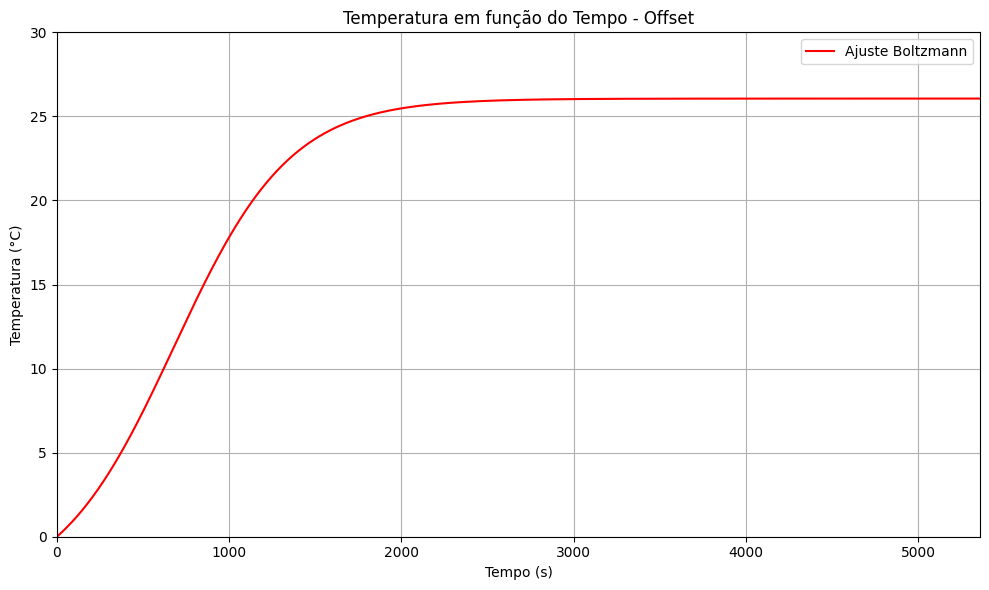

In [410]:
temp_fit_offset = temp_fit - temp_fit[0]

plt.figure(figsize=(10, 6))
plt.plot(time, temp_fit_offset, label="Ajuste Boltzmann", color="red")
plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Temperatura em função do Tempo - Offset")
plt.legend()
plt.grid()
plt.tight_layout()
plt.xlim(min(time), max(time))  # Limites do eixo X
plt.ylim(min(temp_fit_offset), 30)  # Limites do eixo Y
plt.savefig("temperatura_offset_vs_tempo.png")
plt.show()

In [411]:
matlab_data = {"time": time, "temp": temp_fit, "temp_offset": temp_fit_offset}
pd.DataFrame().from_dict(matlab_data).to_csv("dados_aquecedor_matlab.csv", index=False)


limit_inf = np.floor(max(temp_fit_offset)) # limite da função tendendo ao infinito
print(f"Limite quando a função tende ao infinito é {limit_inf}")


Limite quando a função tende ao infinito é 26.0
